In [177]:
# imports
import matplotlib.image as mpimg
from matplotlib import rcParams
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sb
from matplotlib.gridspec import GridSpec
from IPython.display import display
%matplotlib inline

**Author:** Tyler Ryan\
**Date:** 09/19/2024

# Introduction
One of the most pressing issues of our time is the rise in carbon dioxide (CO2) levels in our atmosphere and whether it directly correlates with increasing global temperatures and the decline of our ecosystem. We continue to observe global temperatures consistently breaking record highs year after year. We see heatwaves, rising sea levels, and natural disasters happening more frequently every year. Perhaps the most compelling evidence of an unnatural shift in our climate is the exponential increase in CO2 levels since the onset of the industrial revolution. This surge in greenhouse gases not only warms our planet but also threatens the livelihood of all ecosystems, particularly our forests. Our forests play a critical role in regulating the earth's climate, however as CO2 levels rise, these natural habitats and rhythms are at risk. The question we must ask is: How does the rise in CO2 contribute to higher temperatures and the decline of our world's forests and natural ecosystem?

This data story aims to address this question and is directed towards two groups: those who are willing and capable of engaging with the realities of climate change and take action, and those who are skeptical or often dismiss the evidence as fabrication or the natural fluctuation of the planet. I've heard people say that its just the natural shift in Earth's temperature and that we've had ice ages before, but I believe thats a misunderstanding of the evidence. By presenting this data in very straightforward visualizations, I hope to demystify the idea of climate change and demonstrate an urgent need for awareness. Visualizations are a great way to view this data; rather than looking at raw, difficult, and confusing tables, it is much more digestible to present dated charts that show the course of a value over time. If we can physically see the relationship between CO2 levels, temperature rise, and declinating forest health, we can help the world realize the severity of the situation. 

As a precaution, I implore all readers to _read the captions_! Do _not_ just look at the visuals, or you may be at risk of misunderstanding the data and further cementing your mind in falsehoods. There are a few sections where I show some visuals that, if viewed standalone, seem to go against my narrative - but through reading the paragraphs and captions, one will find that first impressions are not always what they seem. As an example, if you were to look at the two images displayed here, you may believe that rising CO2 levels makes me smile! But alas, if you were to read the caption, you would see that is not the case.

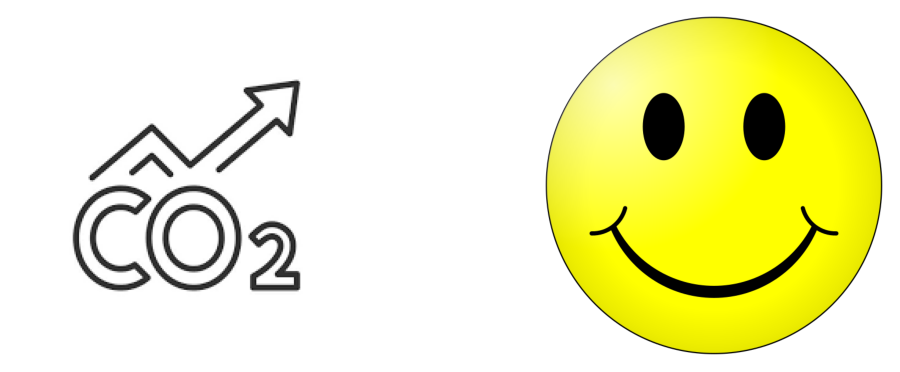

In [182]:
# code to display images below
rcParams['figure.figsize'] = 11 ,8

# read images
img_A = mpimg.imread('co2up.png')
img_B = mpimg.imread('smiley.png')

# display images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_A)
# hide axis for the images
ax[0].axis('off')  
ax[1].imshow(img_B)
ax[1].axis('off')  

# adjust subplot parameters to center the images
plt.subplots_adjust(left=0.1, right=0.9, wspace=.5)

plt.show()

**Left**: _The CO2 levels are rising on the planet._  **Right**: _I am very happy to be sharing this information with you and I hope that this story will convince you that climate change is real._

# The Process 
When I first started this project, I knew I wanted to explore climate change in more depth than I ever had before. This has always been an important topic to me (and hopefully everyone else), so I at least had a general direction to start. I searched for datasets online and found some good data regarding CO2 levels, global temperatures, global forest coverage. The global temperatures datasets were a bit wonky, I they were in a weird format I had never even seen before and had a host of errors when I tried manipulating it, so I gave up on that dataset. Upon further searching, I found another global temperature set that was more in line with what I was looking for.

Once I found these datasets, the direction I went with this project was pretty linear. It wasn't until I was finished manipulating all of those datasets and creating figures for all of them that I decided to introduce a natural disasters dataset into my project. I think that the exponential increase in certain natural disasters is super prevalent today, and I was intrigued to know if the rising CO2 levels could play a role in the increasing scale and intensity of these disasters.

### Data Manipulation
The first order of business was reading the data into dataframes, as done below. I gave some of them names like "dirty" to convey that these datasets are _not_ in the format I want currently and that they will need to be manipulated in order to show what I want.

In [187]:
# Reading data into Dataframes
unavg_co2_df = pd.read_csv('co2.csv')
temps_dirty_df = pd.read_csv('temps_global.csv')
trees_df = pd.read_excel('forest-cover-v1.xlsx')
dirty_disasters_df = pd.read_csv('1900_2021.csv')

The first dataframe I needed to clean up was the CO2 dataframe. The original _.csv_ file was tracking multiple different types of CO2 levels and recorded entries by month. First, I filtered out unnecessary columns and kept only the year, and the CO2 Fit (ppm), which from further research, seems to be the most accurate data. Now that the I had the correct columns, I wanted to aggregate the years together down to an average value for the year. I renamed the CO2 column for clarity; and then repeated a very similar process for the temperature data, as that table was also separated by month. The code for these changes is explained below.

In [189]:
# CO2 DATAFRAME CHANGES
unavg_co2_df = unavg_co2_df[['Year', 'Carbon Dioxide Fit (ppm)']]

# group by year, calculate mean for ppm
co2_df = unavg_co2_df.groupby('Year')['Carbon Dioxide Fit (ppm)'].mean().reset_index()

# rename column
co2_df.columns = ['Year', 'Average CO2 (ppm)']

# remove 1958 and 2017 to filter unclean data
co2_df = co2_df[~co2_df['Year'].isin([1958, 2017])]
temps_dirty_df = temps_dirty_df.sort_values(['AverageTemperature'])

In [190]:
# TEMPERATURE DATAFRAME CHANGES
temps_dirty_df.columns = ['Year', 'AverageTemperature', 'Uncertainty', 'Country']

# substring dates for readability
temps_dirty_df['Year'] = temps_dirty_df['Year'].astype(str).str[:4]

# cast years to int
temps_dirty_df['Year'] = temps_dirty_df['Year'].astype(int)

# drop NaN Values
temps_dirty_df = temps_dirty_df[temps_dirty_df['AverageTemperature'].notna()]

temps_dirty_df = temps_dirty_df.sort_values(by=['Country', 'Year'])

# average temps by year
temps_country_df = temps_dirty_df.groupby(['Year', 'Country']).agg({
    'AverageTemperature' : 'mean'}).reset_index()

temps_df = temps_dirty_df.groupby('Year')['AverageTemperature'].mean().reset_index()

The data for natural disasters was the most difficult to sort and filter. There were some important things I had to take into consideration. The first thing I noticed was that there were exponentially less disasters recorded from 1900-1960 compared to 1960 onward. This was a time of great unrest for the world; World War I, the Spanish Flu, and World War II ravaged our planet. With that, I thought it was only fair to include data from after the 1960s. This is well after the end of WWII and gives the world about ten years to get their record-keeping up to standard. Next, I had to filter out irrelevant columns similarly to the other dataframes, as seen below.

In [195]:
# DISASTERS DATAFRAME CHANGES PT. 1
cols_keep =  ['Year', 'Disaster Type', 'Disaster Subtype', 'Country', 'ISO', 'Total Deaths']
disasters_df = dirty_disasters_df[cols_keep]
disasters_df = disasters_df[disasters_df['Year'] >= 1960]

Moving forward, I set up some queries to grab only the most relevant natural disasters - the ones most often attributed to climate change: Heat waves, Floods, Wildfires, and Hurricanes/Tropical Cyclones.
I ran into a lot of problems with this, and in the end I had to query and rename multiple entries. Finally, I made a count of each disaster per year and send that data to a new dataframe for display later.

In [198]:
# DISASTERS DATAFRAME CHANGES PT. 2
# query relevant disasters
disasters_df_query = disasters_df[
    (disasters_df['Disaster Subtype'] == 'Heat wave') |
    (disasters_df['Disaster Type'] == 'Flood') |
    (disasters_df['Disaster Type'] == 'Wildfire') |
    (disasters_df['Disaster Subtype'] == 'Tropical cyclone')
]

# replace NaN values with 'flood'
disasters_df_query = disasters_df_query.copy()
disasters_df_query['Disaster Subtype'] = disasters_df_query['Disaster Subtype'].fillna('Flood')

# set disaster subtype to wildfire for streamline-ification. yees i made that up just now
disasters_df_query.loc[disasters_df_query['Disaster Type'] == 'Wildfire', 'Disaster Subtype'] = 'Wildfire'

# # re filter again
disasters_df_query = disasters_df_query[
    (disasters_df_query['Disaster Subtype'] == 'Heat wave') |
    (disasters_df_query['Disaster Subtype'] == 'Flood') |
    (disasters_df_query['Disaster Subtype'] == 'Wildfire') |
    (disasters_df_query['Disaster Subtype'] == 'Tropical cyclone')
]

disaster_counts = disasters_df_query.groupby(['Year', 'Disaster Subtype']).size().unstack(fill_value=0)

# Rising Temperatures and the Correlation to Rising CO2 Levels
If we plot the average global temperature (C) for every year since 1700, we can see a VERY clear trend - **increase.** You may notice that the largest and most drastic increase in global temperatures occur roughly between the years of _1750_ and _~1860_ - which those historically inclinced may notice - is the main **boom** of the Industrial Revolution. This heavily implies that the industrial revolution has had a major impact on our global temperatures with the rising production of carbon dioxide during this time as fossil fuel consumption increases. 

By the end of the revolution in roughly 1860, the global temperatures would continue to increase, but at a slower rate. We can see from 1860 to around 2013, 


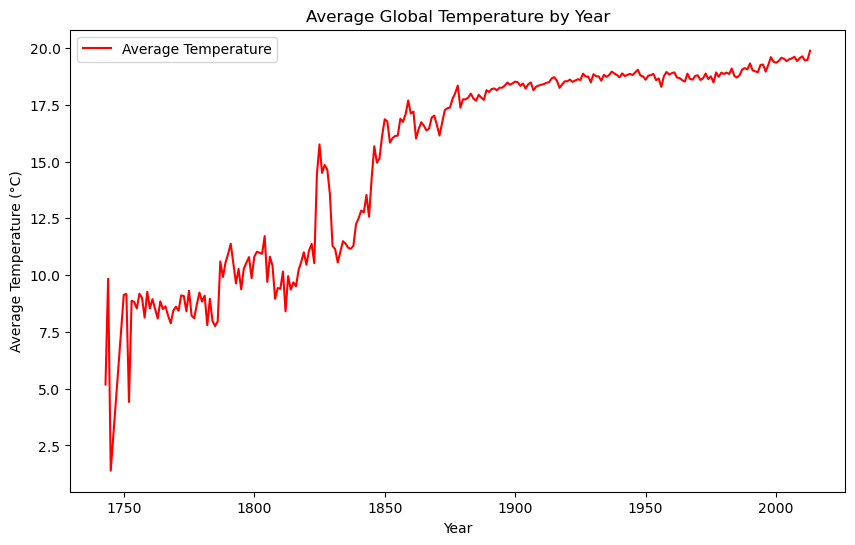

In [201]:
# Create a line plot of average temperature by year
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(temps_df['Year'], temps_df['AverageTemperature'], color='red', label='Average Temperature')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Global Temperature by Year')

# Display the legend
plt.legend()

# Show the plot
plt.show()

*Rising temperatures shown throughout recent history. Note the drastic increase during the industrial revolution, then a relatively linear increase in the years immediately thereafter.*

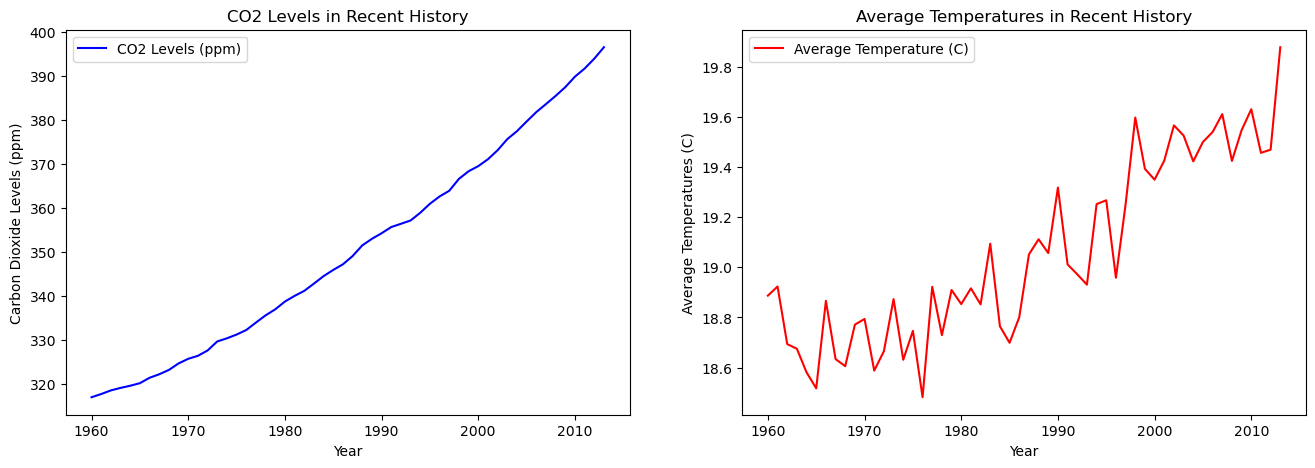

In [100]:
# Merge co2 and temperature dataframes to show correlation
correlation_df = pd.merge(temps_df, co2_df, on='Year')

# create a figure with a gridspec layout for side by side display
fig = plt.figure(figsize=(16, 5))
gs = GridSpec(1, 2, figure=fig)

# first subplot for co2 levels
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(correlation_df['Year'], correlation_df['Average CO2 (ppm)'], label='CO2 Levels (ppm)', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Carbon Dioxide Levels (ppm)')
ax1.set_title('CO2 Levels in Recent History')
ax1.legend()

# second subplot for avg temperatures
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(correlation_df['Year'], correlation_df['AverageTemperature'], label='Average Temperature (C)', color='red')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Temperatures (C)')
ax2.set_title('Average Temperatures in Recent History')
ax2.legend()
plt.show()

### A correlation begins to show its head

Its obvious that over time, the CO2 levels in our atmosphere have drastically increased. In 1960, there were roughly 310PPM of carbon dioxide in the air. At the same time, the average world temperature in 1960 was around 18.8° C, which roughly translates to 65° F.44

Ignoring the occasional temperature fluctuations, it is very obvious that the average temperature of Earth is rapidly increasing along with the increasing CO2 levels, which traps heat in our atmosphere.

# Tree Coverage Data

In [173]:
# filter columns
columns_to_keep = ['Country Name', 'Country Code'] + [col for col in trees_df.columns if 'Forest Area' in col]
trees_df = trees_df[columns_to_keep]

### Map the Data

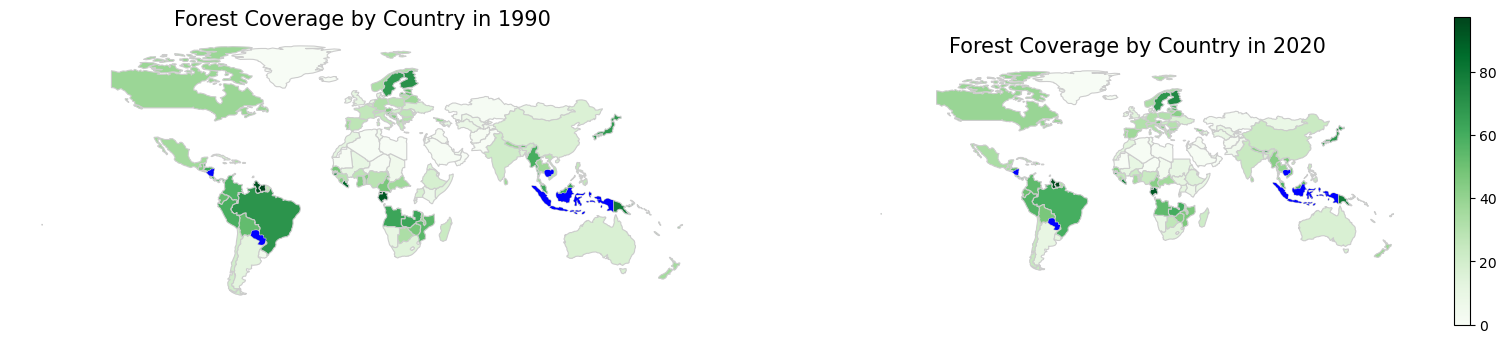

In [177]:
world = gpd.read_file('world/world_lowres.shp')

# Merge the world GeoDataFrame with trees_df on 'Country Name'
merged = world.merge(trees_df, how='left', left_on='ADMIN', right_on='Country Name')

highlight_countries = ['Nicaragua', 'Paraguay', 'Gambia, The Country', 'Cambodia', 'Indonesia']

# Create a new column for color
merged['color'] = merged['ADMIN'].apply(lambda x: 'blue' if x in highlight_countries else 'green')

# Create a figure with two subplots for side-by-side display
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))

# Plot the map for 1990
merged.plot(column="Forest Area 1990", cmap='Greens', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=False)
ax1.set_title('Forest Coverage by Country in 1990', fontdict={'fontsize': '15', 'fontweight': '3'})
ax1.axis('off')

# Highlight specific countries
merged[merged['ADMIN'].isin(highlight_countries)].plot(ax=ax1, color='blue')

# Plot the map for 2020
merged.plot(column="Forest Area 2020", cmap='Greens', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)
ax2.set_title('Forest Coverage by Country in 2020', fontdict={'fontsize': '15', 'fontweight': '3'})
ax2.axis('off')

# Highlight specific countries in 2020
merged[merged['ADMIN'].isin(highlight_countries)].plot(ax=ax2, color='blue')

# Display both plots side by side
plt.show()

# Well that doesn't look like much

## Let's track the top 5 biggest changes in forest coverage and make this obvious

In [181]:
# Calculate the difference between Forest Area 2020 and Forest Area 1990
trees_df['Difference 1990-2020'] = trees_df['Forest Area 2020'] - trees_df['Forest Area 1990']

# Sort the DataFrame by the difference in descending order
top_countries = trees_df.sort_values(by='Difference 1990-2020', ascending=True)

# Get the top 5 countries
bot_5_countries = top_countries.head(5)

# Display the top 5 countries with the highest difference
bot_5_countries = bot_5_countries[['Country Name', 'Forest Area 1990', 'Forest Area 2020', 'Difference 1990-2020']]

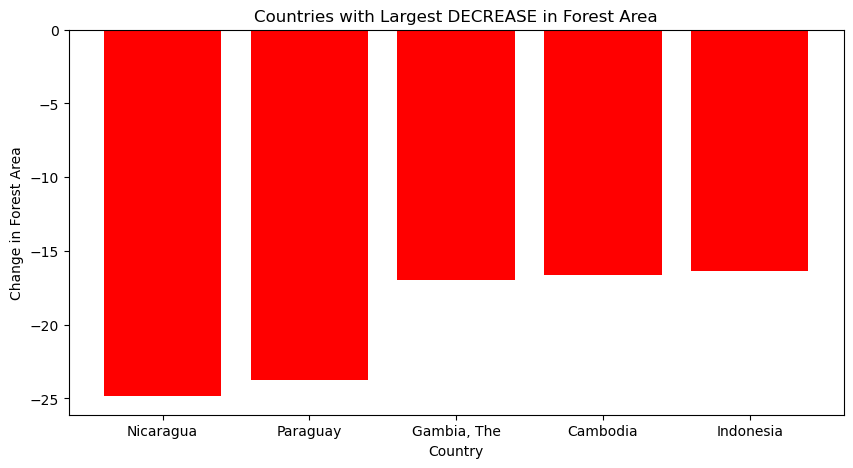

In [183]:
countries = bot_5_countries['Country Name']
differences = bot_5_countries['Difference 1990-2020']

plt.figure(figsize=(10,5))
plt.bar(countries, differences, color='red')

plt.xlabel('Country')
plt.ylabel('Change in Forest Area')
plt.title('Countries with Largest DECREASE in Forest Area')

plt.show()

## We can see countries adversely affected by deforestation

So it seems from 1990-2020, the highest change in forest coverage around the world was a net increase of nearly 25% of a countries forest area.

In [187]:
# Sort the DataFrame by the difference in descending order
top_countries = trees_df.sort_values(by='Difference 1990-2020', ascending=False)

# Get the top 5 countries
top_5_countries = top_countries.head(5)

# Display the top 5 countries with the highest difference
top_5_countries = top_5_countries[['Country Name', 'Forest Area 1990', 'Forest Area 2020', 'Difference 1990-2020']]

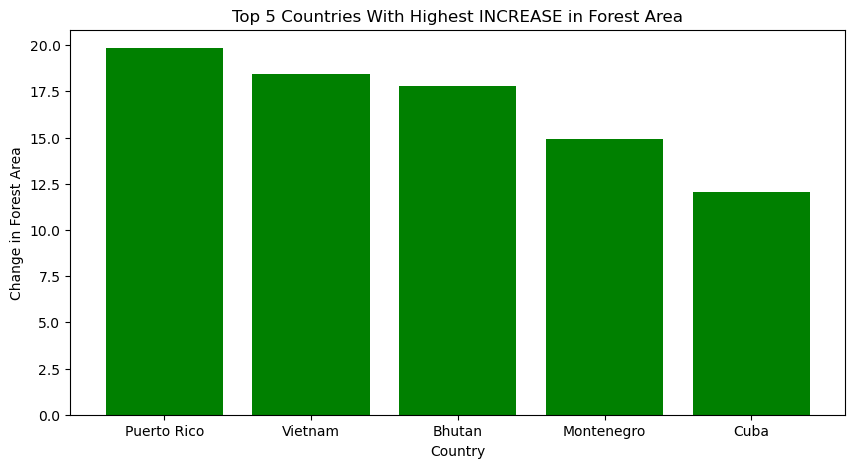

In [189]:
countries = top_5_countries['Country Name']
differences = top_5_countries['Difference 1990-2020']

plt.figure(figsize=(10,5))
plt.bar(countries, differences, color='green')

plt.xlabel('Country')
plt.ylabel('Change in Forest Area')
plt.title('Top 5 Countries With Highest INCREASE in Forest Area')

plt.show()

In [191]:
world = gpd.read_file('world/world_lowres.shp')

# merged = world.merge(temps_country_df, how='left', left_on='ADMIN', right_on='Country')

# # Plot the map
# fig, ax = plt.subplots(1, 1, figsize=(25, 10))
# merged.plot(column="% Change", cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# # Add title and axis off
# ax.set_title('Forest Coverage by Country in 2020', fontdict={'fontsize': '15', 'fontweight': '3'})
# ax.axis('off')

# plt.show()

,Year,Country,AverageTemperature
0,1743,Albania,8.620
1,1743,Andorra,7.556
2,1743,Austria,2.482
3,1743,Belarus,0.767
4,1743,Belgium,7.106


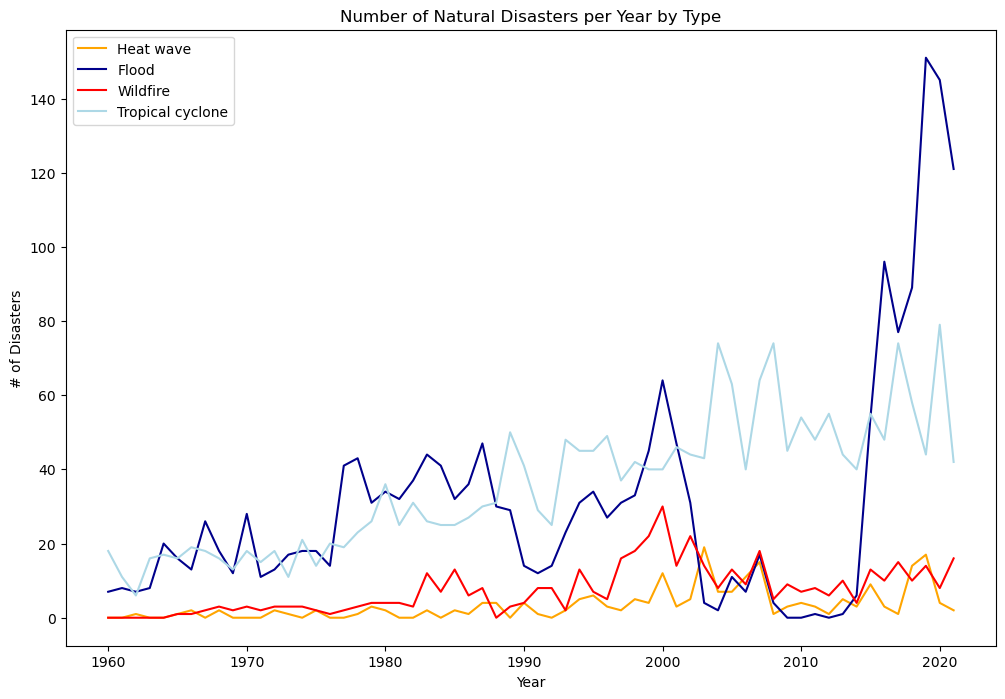

In [36]:

# create yearly disaster count plot
plt.figure(figsize=(12,8))

# plot each disaster subtype 
plt.plot(disaster_counts.index, disaster_counts['Heat wave'], label='Heat wave', color='orange')
plt.plot(disaster_counts.index, disaster_counts['Flood'], label='Flood', color='darkblue')
plt.plot(disaster_counts.index, disaster_counts['Wildfire'], label='Wildfire', color='red')
plt.plot(disaster_counts.index, disaster_counts['Tropical cyclone'], label='Tropical cyclone', color='lightblue')

# axis labels
plt.xlabel('Year')
plt.ylabel('# of Disasters')
plt.title('Number of Natural Disasters per Year by Type')
plt.legend()
plt.show()

Sources:\
https://education.nationalgeographic.org/resource/industrialization-labor-and-life/